# Plane Crash Info

This exercise is trying to make some more sense out of the data collected at http://PlaneCrashInfo.com, which contains way too few charts for this topic. Using this notebook you can explore the data and add your own charts.

**N.B.** This is work in progress… If you have any suggestion, please feel free to raise an issue or provide a pull request in the [repo on GitHub](https://github.com/deeplook/notebooks/tree/master/planecrashinfo/)!

In [1]:
%matplotlib inline

In [2]:
import datetime

## Raw Data

In [3]:
from planecrashinfo import *
df = pd.read_pickle('planecrashinfo/1921-2016_original.pickle')

In [4]:
df.head()

-,Date:,Time:,Location:,Operator:,Flight #:,Route:,AC Type:,Registration:,cn / ln:,Aboard:,Fatalities:,Ground:,Summary:
ACCIDENT DETAILS,"February 03, 1921",?,"Mendotta, Minnisota",US Aerial Mail Service,?,?,De Havilland DH-4,130,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,?
ACCIDENT DETAILS,"February 09, 1921",?,"La Crosse, Wisconsin",US Aerial Mail Service,?,?,Junkers F-13,301,?,3 (passengers:2 crew:1),3 (passengers:2 crew:1),0,?
ACCIDENT DETAILS,"February 15, 1921",?,Off Gibraltar,Aeropostale,?,?,Breguet 14,F-ALBA,?,2 (passengers:? crew:?),2 (passengers:? crew:?),0,?
ACCIDENT DETAILS,"February 22, 1921",?,"Elko, Nevada",US Aerial Mail Service,?,?,De Havilland DH-4,67,?,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0,?
ACCIDENT DETAILS,"April 06, 1921",?,"Point Cook, Australia",Military - Royal Australian Air Force,?,?,Avro 504,H3021,?,2 (passengers:? crew:?),1 (passengers:? crew:?),0,?


## Clean(er) Data

In [5]:
df = clean_database(df)

In [6]:
df.head()

-,Time,Location,Operator,Route,AC Type,Aboard,Fatalities,Ground,Summary,Origin,Destination,Fatalities total,Location Country
1921-02-03,NaN,"Mendotta, Minnisota",US Aerial Mail Service,NaN,De Havilland DH-4,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,NaN,NaN,NaN,1.0,Minnisota
1921-02-09,NaN,"La Crosse, Wisconsin",US Aerial Mail Service,NaN,Junkers F-13,3 (passengers:2 crew:1),3 (passengers:2 crew:1),0.0,NaN,NaN,NaN,3.0,USA
1921-02-15,NaN,Off Gibraltar,Aeropostale,NaN,Breguet 14,2 (passengers:? crew:?),2 (passengers:? crew:?),0.0,NaN,NaN,NaN,2.0,Off Gibraltar
1921-02-22,NaN,"Elko, Nevada",US Aerial Mail Service,NaN,De Havilland DH-4,1 (passengers:0 crew:1),1 (passengers:0 crew:1),0.0,NaN,NaN,NaN,1.0,USA
1921-04-06,NaN,"Point Cook, Australia",Military - Royal Australian Air Force,NaN,Avro 504,2 (passengers:? crew:?),1 (passengers:? crew:?),0.0,NaN,NaN,NaN,1.0,Australia


## Numbers

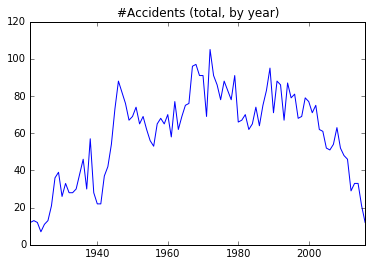

In [7]:
s = df.groupby(df.index.year).size()
s.plot.line(title='#Accidents (total, by year)')

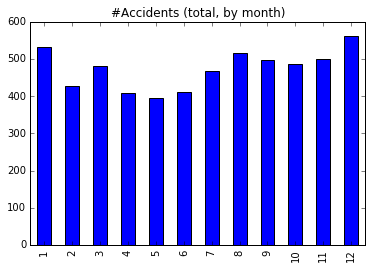

In [8]:
s = df.groupby(df.index.month).size()
s.plot.bar(title='#Accidents (total, by month)')

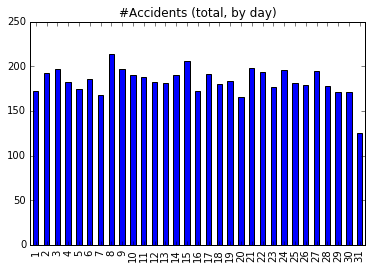

In [9]:
s = df.groupby(df.index.day).size()
s.plot.bar(title='#Accidents (total, by day)')

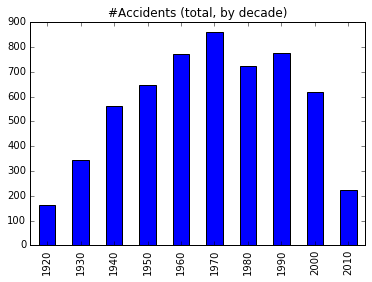

In [10]:
s = df.groupby((df.index.year // 10) * 10).size()
s.plot.bar(title='#Accidents (total, by decade)')

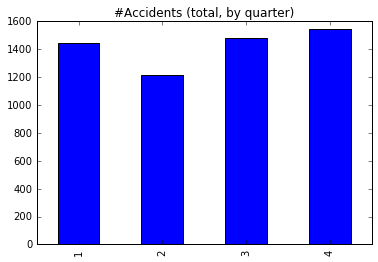

In [11]:
s = df.groupby((df.index.quarter)).size()
s.plot.bar(title='#Accidents (total, by quarter)')

## Fatalities

In [12]:
df['Fatalities total'].groupby(df.index.year).sum()

1921      67.0
1922      89.0
1923      76.0
1924      20.0
1925      39.0
1926      37.0
1927      62.0
1928     113.0
1929     133.0
1930     147.0
1931     102.0
1932      75.0
1933     205.0
1934     129.0
1935     234.0
1936     252.0
1937     227.0
1938     468.0
1939     160.0
1940     213.0
1941     246.0
1942     506.0
1943     676.0
1944     689.0
1945    1365.0
1946    1351.0
1947    1306.0
1948    1254.0
1949    1163.0
1950    1438.0
         ...  
1987    1723.0
1988    2034.0
1989    2283.0
1990    1182.0
1991    1839.0
1992    2121.0
1993    1571.0
1994    1876.0
1995    1593.0
1996    2386.0
1997    1672.0
1998    1544.0
1999     971.0
2000    1469.0
2001    1416.0
2002    1433.0
2003    1279.0
2004     728.0
2005    1317.0
2006    1161.0
2007     931.0
2008     824.0
2009    1095.0
2010    1087.0
2011     764.0
2012     596.0
2013     341.0
2014    1189.0
2015     770.0
2016     218.0
Name: Fatalities total, dtype: float64

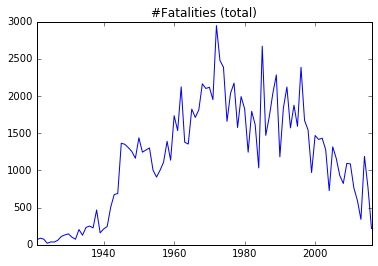

In [13]:
df['Fatalities total'].groupby(df.index.year).sum().plot.line(title='#Fatalities (total)')

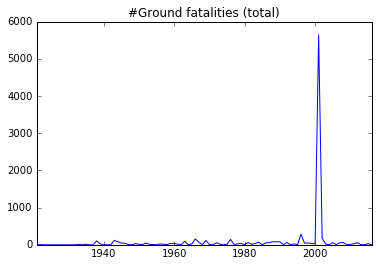

In [14]:
df['Ground'].groupby(df.index.year).sum().plot(title='#Ground fatalities (total)')

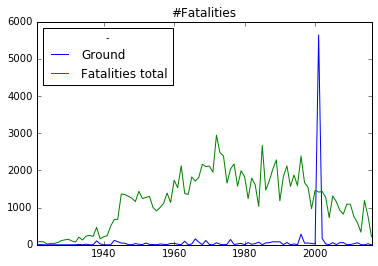

In [15]:
df.groupby(df.index.year).sum().plot(title='#Fatalities')

## Aircraft

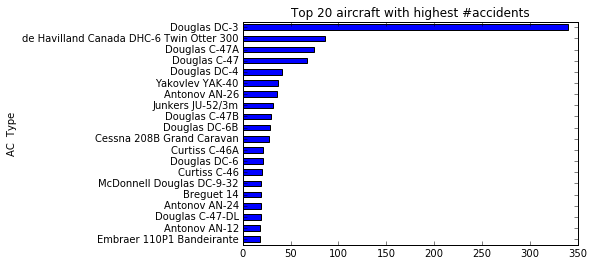

In [16]:
s = df.groupby('AC  Type').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Top 20 aircraft with highest #accidents')

In [17]:
doug = [op for op in df['AC  Type'].unique() if type(op) == str and op.startswith('Douglas')]
anto = [op for op in df['AC  Type'].unique() if type(op) == str and op.startswith('Antonov')]
airb = [op for op in df['AC  Type'].unique() if type(op) == str and op.startswith('Airbus')]
boei = [op for op in df['AC  Type'].unique() if type(op) == str and op.startswith('Boeing')]

In [18]:
airb

['Airbus A300',
 'Airbus A.300B4-203',
 'Airbus A320-111',
 'Airbus A300B2-203',
 'Airbus A320-231',
 'Airbus A310-304',
 'Airbus A300B4-203',
 'Airbus A320-211',
 'Airbus A300B4-622R',
 'Airbus A330-321',
 'Airbus A300B2-1C',
 'Airbus A310-324',
 'Airbus A300-B4-200',
 'Airbus A300-622R',
 'Airbus A.320-214',
 'Airbus A-310-204',
 'Airbus A300B2-101',
 'AirbusA310-304',
 'Airbus A.330-301',
 'Airbus A320-212',
 'Airbus A300-600R',
 'Airbus A-330-243',
 'Airbus A-300-605R',
 'Airbus A-340',
 'Airbus A-310-324ET',
 'Airbus A-320-233',
 'Airbus A-310-324',
 'Airbus A320-232',
 'Airbus A320-214',
 'Airbus A330-203',
 'Airbus A300B4-203F',
 'Airbus A330-202',
 'Airbus A321-231',
 'Airbus A300F-622R',
 'Airbus A-320-216',
 'Airbus A-310-304F',
 'Airbus A321-111']

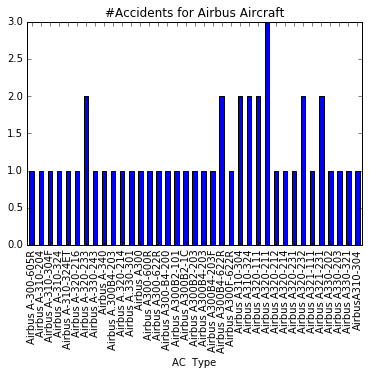

In [19]:
s = df[df['AC  Type'].isin(airb)].groupby('AC  Type').size()
s.plot.bar(title='#Accidents for Airbus Aircraft')

In [20]:
import re

def extract_airbus_type(ac_type):
    "Extract main Airbus type from 'AC Type', e.g. 'A300' from 'Airbus A-300-605R'."

    if type(ac_type) != str:
        return ''
    pat = 'Airbus ?(A[\.\-]?\d{3,3})'
    m = re.search(pat, ac_type)
    if m:
        return m.groups()[0].replace('-', '').replace('.', '')
    else:
        return ''

airbus_types = set([extract_airbus_type(a) for a in airb])

In [21]:
airbus_types

{'A300', 'A310', 'A320', 'A321', 'A330', 'A340'}

In [22]:
df['Airbus Type'] = df['AC  Type'].apply(extract_airbus_type)

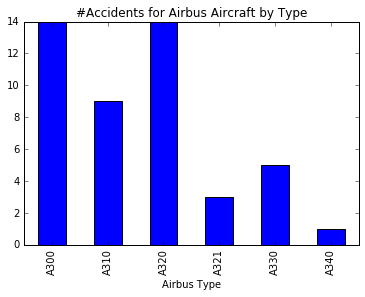

In [23]:
s = df[df['Airbus Type'].isin(airbus_types)].groupby('Airbus Type').size()
s.plot.bar(title='#Accidents for Airbus Aircraft by Type')

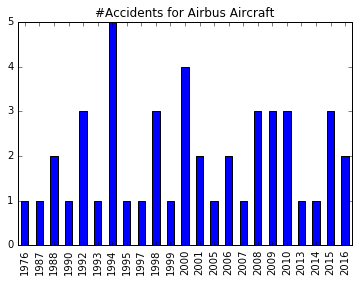

In [24]:
df2 = df[df['AC  Type'].isin(airb)]
s2 = df2.groupby(df2.index.year).size()
s2.plot.bar(title='#Accidents for Airbus Aircraft')

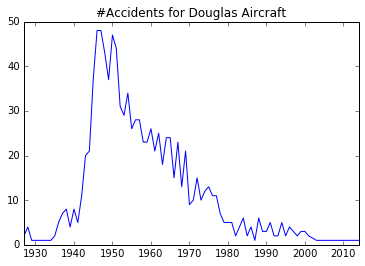

In [25]:
df1 = df[df['AC  Type'].isin(doug)]
s1 = df1.groupby(df1.index.year).size()
s1.plot.line(title='#Accidents for Douglas Aircraft')

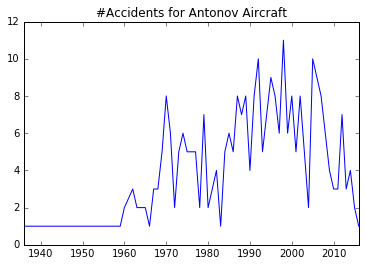

In [26]:
df3 = df[df['AC  Type'].isin(anto)]
s3 = df3.groupby(df3.index.year).size()
s3.plot.line(title='#Accidents for Antonov Aircraft')

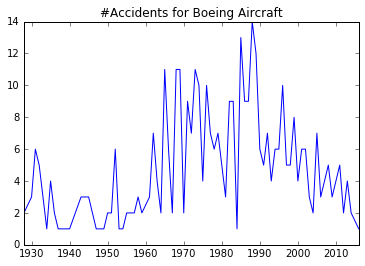

In [27]:
df4 = df[df['AC  Type'].isin(boei)]
s4 = df4.groupby(df4.index.year).size()
s4.plot.line(title='#Accidents for Boeing Aircraft')

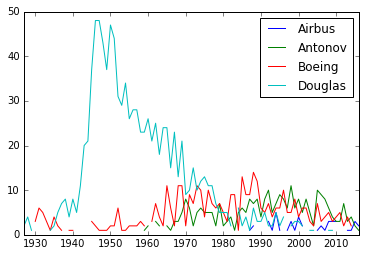

In [28]:
dfab = pd.DataFrame(data={'Douglas': s1, 'Airbus': s2, 'Antonov': s3, 'Boeing': s4})
dfab.plot.line()

## Operators

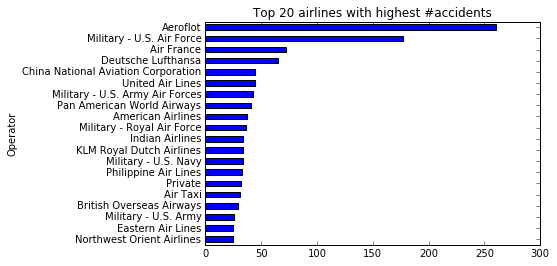

In [29]:
s = df.groupby('Operator').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Top 20 airlines with highest #accidents')

In [30]:
mil_ops = sorted([op for op in df['Operator'].unique() if type(op) == str and 'Military' in op])

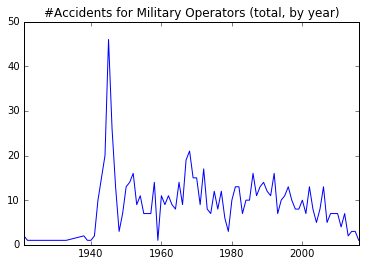

In [31]:
df4 = df[df['Operator'].isin(mil_ops)]
s4 = df4.groupby(df4.index.year).size()
s4.plot.line(title='#Accidents for Military Operators (total, by year)')

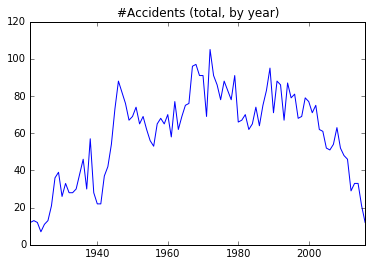

In [32]:
s = df.groupby(df.index.year).size()
s.plot.line(title='#Accidents (total, by year)')

## Routes

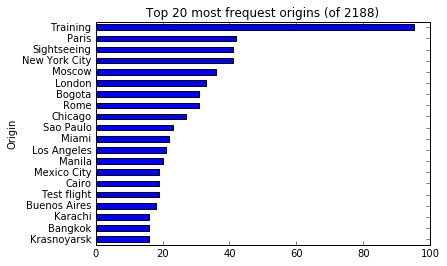

In [33]:
s = df.groupby('Origin').size().sort_values(ascending=True)
s[-20:].plot.barh(title='Top 20 most frequest origins (of %d)' % len(s))

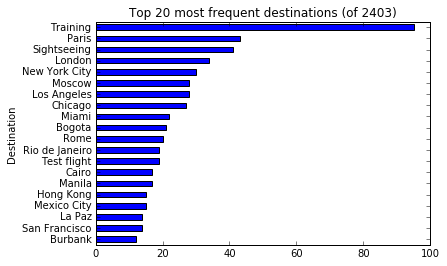

In [34]:
s = df.groupby('Destination').size().sort_values(ascending=True)
s[-20:].plot.barh(title='Top 20 most frequent destinations (of %d)' % len(s))

## Locations

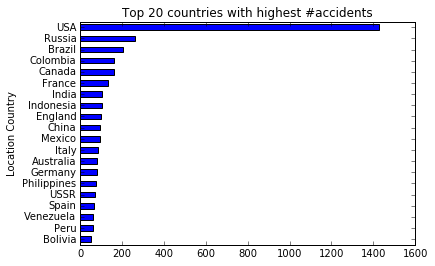

In [35]:
s = df.groupby('Location Country').size().sort_values(ascending=True)[-20:]
s.plot.barh(title='Top 20 countries with highest #accidents')

For respective maps see below...

## Example using shapes, not yet working...

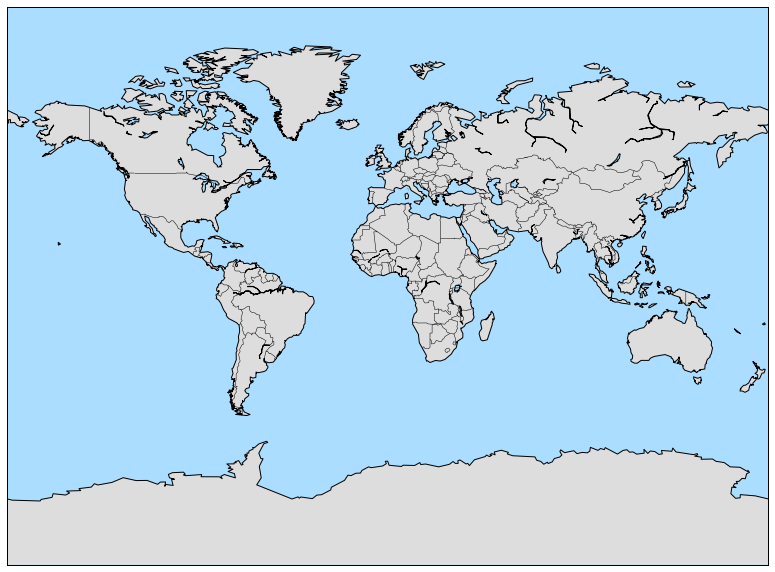

In [36]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

plt.figure(num=1, figsize=(20, 10))
map = Basemap(projection='mill', lat_0=0, lon_0=0)
map.drawmapboundary(fill_color='#aaddff')
map.fillcontinents(color='#dddddd', lake_color='#aaddff')
map.drawcountries()
map.drawcoastlines()
# map.readshapefile('geo/ne_10m_admin_0_boundary_lines_map_units/ne_10m_admin_0_boundary_lines_map_units', 'world')
plt.show()

## Map of Crash Locations

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

def show_map(latlons, proj='mill', lat_0=0, lon_0=0):
    "Show a world map."
    
    plt.figure(num=1, figsize=(20,10))

    map = Basemap(projection=proj, lat_0=lat_0, lon_0=lon_0, resolution='c')
    map.drawcoastlines()
    map.drawcountries()
    map.drawparallels(np.arange(-90, 90, 30), labels=[1, 0, 0, 0])
    map.drawmeridians(np.arange(map.lonmin, map.lonmax + 30, 60), labels=[0, 0, 0, 1])
    map.drawmapboundary(fill_color='#aaddff')
    map.fillcontinents(color='#dddddd', lake_color='#aaddff')

    for (lat, lon) in latlons:
        map.plot(lon, lat, 'ro', markersize=3, latlon=True)

    plt.show()

In [38]:
locs = json.load(open('geo_locations.json'))
latlons = list(filter(None, locs.values()))
print('#locations found: %d' % len(locs))
print('#coordinates found: %d' % len(latlons))

#locations found: 4626
#coordinates found: 2456


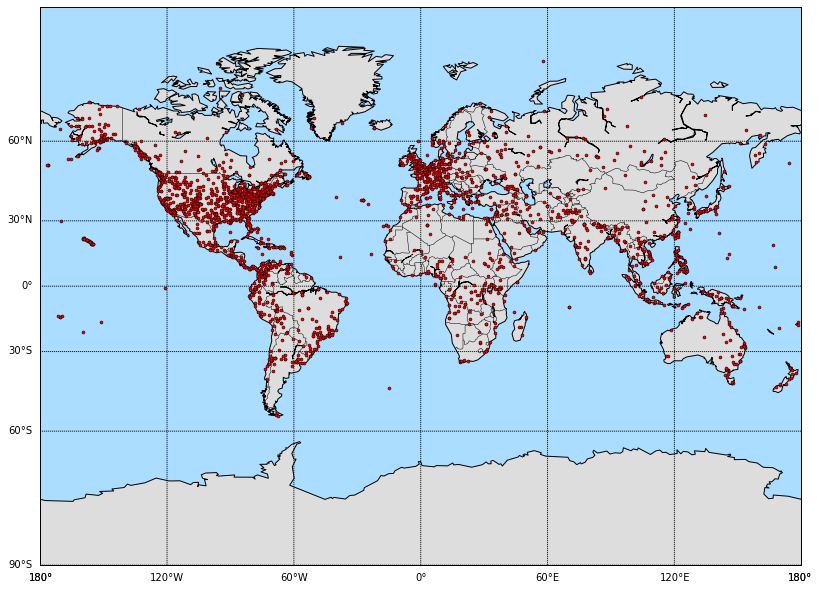

In [39]:
show_map(latlons, proj='mill')

                Geostationary, Orthographic or Azimuthal equidistant basemap
                

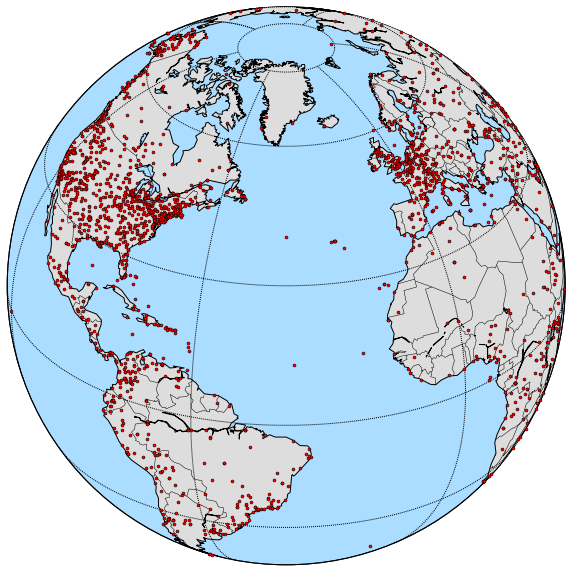

In [40]:
show_map(latlons, proj='ortho', lat_0=30, lon_0=-40)